# Análise Exploratória Desafio Graph Missing Edges
-   Dados:

    -   Node attributes:
    
        -   id - numeric id of node

        -   label - alphanumeric id of a node - venue id

        -   latitude - venue latitude

        -   longitude - venue longitude

        -   reviewCount - venue review count

        -   categories - ids of venue categories. Their names can be found in a separated file: categories.csv

        -   name - venue name

        -   stars - venue star number

    -   Edge atributes:

        -   weight - number of times a certain edge was created
        
    -   Categories:

        -   CategoryId - numeric id of a category

        -   names - category name

## Bibliotecas

In [46]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

# Leitura de Arquivos e Tratamento de Dados

In [47]:
G = nx.read_gml("./../data/GraphMissingEdges.gml")

In [ ]:
categories_nodes = nx.get_node_attributes(G,'categories')
for key in categories_nodes:
    categories_nodes[key] = categories_nodes[key].split(',')

In [ ]:
categories_df = pd.read_csv('./../data/categories.csv', sep=',')
categories_df = categories_df.set_index('CategoryId')

In [ ]:
for node in G.nodes:
    categories = categories_nodes[node]
    categories_names = []
    for category in categories:
        if category != '':
            categories_names.append(categories_df.loc[int(category)]['names'])
    nx.set_node_attributes(G, {node: categories_names}, 'categories_names')

In [49]:
for node in G.nodes:
    print(G.nodes[node]['name'], G.nodes[node]['categories_names'])
    print(G.degree(node))
    print('------------------')

Cafe Fifth Ave ['Restaurants', 'Cafes']
2
------------------
Good Fellas Barber Shop ['Beauty & Spas', 'Barbers']
2
------------------
Tightspot Dancewear Center ['Shopping', 'Arts & Crafts', 'Shoe Stores', 'Costumes', 'Fashion']
1
------------------
Evolve Wellness Spa Shadyside ['Day Spas', 'Beauty & Spas', 'Health & Medical', 'Acupuncture', 'Massage Therapy', 'Massage']
17
------------------
Nova Dental Associates ['Orthodontists', 'Health & Medical', 'General Dentistry', 'Cosmetic Dentists', 'Oral Surgeons', 'Dentists']
0
------------------
The Saloon of Mt Lebanon ['Nightlife', 'Restaurants', 'Sports Bars', 'Bars', 'American (Traditional)', 'Burgers']
12
------------------
Bagel Factory ['Bakeries', 'Restaurants', 'Bagels', 'Food']
3
------------------
Round Corner Cantina ['Lounges', 'Restaurants', 'Cocktail Bars', 'Mexican', 'Nightlife', 'Bars', 'Dance Clubs']
46
------------------
China Garden ['Chinese', 'Restaurants']
4
------------------
South Side BBQ Company Truck ['Catere

## Coeficiente de Clusterização Geral

In [52]:
print(nx.average_clustering(G))

0.04489358044799767


In [57]:
list_clustering = []

for node in G.nodes:
        if  G.degree(node) > 10:
                list_clustering.append({'name': G.nodes[node]['name'],
                                'Coeficiente de Cluterização': nx.clustering(G, node), 
                                'Grau':G.degree(node)})
print(list_clustering)

[{'name': 'Evolve Wellness Spa Shadyside', 'Coeficiente de Cluterização': 0.0761904761904762, 'Grau': 17}, {'name': 'The Saloon of Mt Lebanon', 'Coeficiente de Cluterização': 0.15555555555555556, 'Grau': 12}, {'name': 'Round Corner Cantina', 'Coeficiente de Cluterização': 0.12657004830917876, 'Grau': 46}, {'name': 'The Foundry Table & Tap', 'Coeficiente de Cluterização': 0.08571428571428572, 'Grau': 50}, {'name': 'Pasha Cafe Lounge', 'Coeficiente de Cluterização': 0.11585365853658537, 'Grau': 41}, {'name': 'Coca Cafe', 'Coeficiente de Cluterização': 0.08441318030359127, 'Grau': 76}, {'name': 'China Palace', 'Coeficiente de Cluterização': 0.03296703296703297, 'Grau': 14}, {'name': 'Butcher and the Rye', 'Coeficiente de Cluterização': 0.07482993197278912, 'Grau': 99}, {'name': 'Grandpa Joes Candy Shop', 'Coeficiente de Cluterização': 0.15384615384615385, 'Grau': 14}, {'name': "Barb's Corner Kitchen", 'Coeficiente de Cluterização': 0.09941520467836257, 'Grau': 19}, {'name': 'Church Brew W

In [58]:
df_clustering = pd.DataFrame.from_dict(list_clustering)

## Histograma do Grau dos Nós

Text(0.5, 1.0, 'Histograma dos Graus dos Nós')

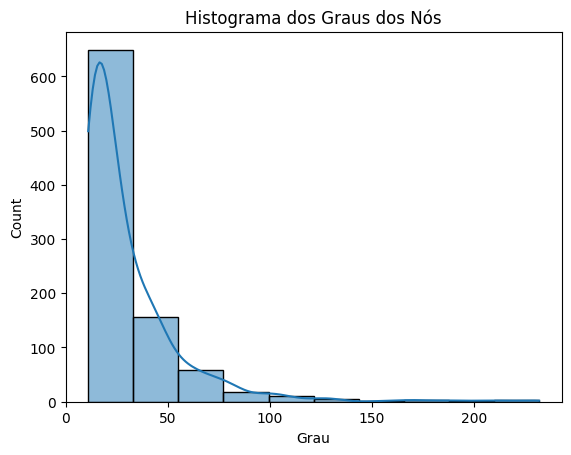

In [65]:


sns.histplot(data=df_clustering, x="Grau", bins=10, kde=True)
plt.title('Histograma dos Graus dos Nós')

## Histograma do Coeficiente de Clusterização

<Axes: xlabel='Coeficiente de Cluterização', ylabel='Count'>

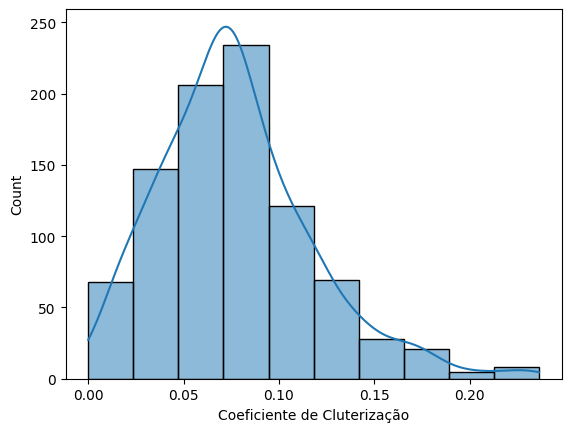

In [61]:
sns.histplot(data=df_clustering, x="Coeficiente de Cluterização", bins=10, kde=True)

## Densidade do Grafo

In [ ]:
print(f"density: {nx.density(G)}")

density: 0.0018150582646987846


## Visualização dos Edges

In [ ]:
# Quais são os nós que possuem arestas com peso maior que 10?
list_peso = []

for v, u in G.edges:
    if G.get_edge_data(v,u)['weight'] >= 10:
        print(G.nodes[v]['name'] + ' --------------- ' + G.nodes[u]['name'])
        list_peso.append(G.get_edge_data(v,u))
        print(G.get_edge_data(v,u)['weight'])

print(max(list_peso, key=lambda x:x['weight']))

Bakersfield --------------- Pork & Beans
10
Bakersfield --------------- Smallman Galley
12
Millie's Homemade Ice Cream --------------- Noodlehead
16
Mindful Brewing Company --------------- Mindful Brewing Company
10
täkō --------------- Gaucho Parrilla Argentina
21
täkō --------------- Meat & Potatoes
13
Meat & Potatoes --------------- Gaucho Parrilla Argentina
12
Condado Tacos --------------- Pittsburgh Poke
12


In [76]:
reviewCount = nx.get_node_attributes(G, "reviewCount")
stars = nx.get_node_attributes(G, "stars")

df_review = pd.DataFrame.from_dict(reviewCount, orient ='index')
df_starts = pd.DataFrame.from_dict(stars, orient ='index')


In [77]:
df_review

,0
ql0AaBp68ckekxvWOF8xLA,20
WHxonk9W_sRLk8cwOoZQqQ,12
P6HDtlj1GSu9UG2Aal2PPg,4
3kUqNxO1rkDDb89GAfyNgw,95
v_pED2nMFPsBGD4Tq2ygBw,5
...,...
sw0nkPQvtxLtTyRnr-dt7A,49
QmTb7f_oeM7o6DLIQ2I2Jg,44
J9ZkLjaQXo1iNhHdHi71qQ,3
9IhBQ7mTYajCQtIrEjv5KQ,3


ValueError: x and y must have same first dimension, but have shapes (13,) and (110,)

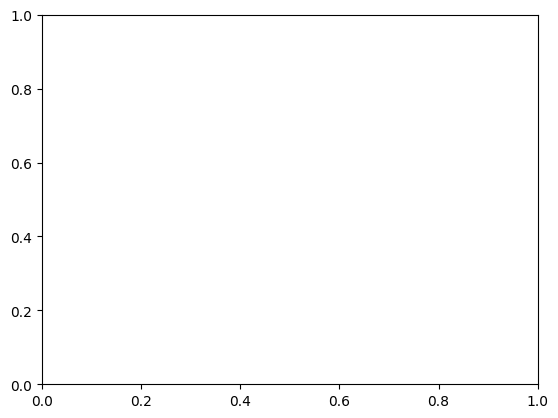

In [ ]:
peso_edge = []

for v, u in G.edges:
    if G.get_edge_data(v,u)['weight'] > 0:
        peso_edge.append(G.get_edge_data(v,u)['weight'])

list_peso = []
for i in peso_edge:
    list_peso.append(i)

lista = list(sorted(set(list_peso)))

hist = [peso_edge.count(x) for x in valores]

plt.plot(lista, hist ,'ro-') 

plt.xlabel('Grau')
plt.ylabel('Numero de nós')

In [ ]:
print(hist.shape)
print(lista.shape)

AttributeError: 'list' object has no attribute 'shape'